# USE CASE : CRIME RATE

# Summary

The problem concerns the prediction of crime rate from demographic data using linear regression. First, we read the excel file and then split the data into train and test data. Then, we set up the model and fit the data using X_train and Y_train. We find the model coefficients and model intercept. We make predictions on crime rate using the test data and find mean squared error and variance score of the model. Finally, we plot actual values and predicted values and find Pearson's correlation coefficients for the different features. We see that feature X7 has the least influence on the traget variable X1.

In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats

In [242]:
df = pd.read_excel("crime.xlsx")

In [243]:
df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


# Reaname columns

In [276]:
df2 = df.rename(columns = {'X1':'crime_rate per 1 million','X2': 'crime rate per 100,000','X3':'annual police funding','X4':'25year_4yearsschool','X5':'16-19 not high school','X6':'18-24 in college','X7':'25 years 4 years college'})

In [277]:
df2

,crime_rate per 1 million,"crime rate per 100,000",annual police funding,25year_4yearsschool,16-19 not high school,18-24 in college,25 years 4 years college
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24
5,603,260,25,68,8,32,15
6,484,325,34,68,12,24,14
7,546,102,33,62,13,28,11
8,424,38,36,69,7,25,12
9,548,226,31,66,9,58,15


In [278]:
df2

,crime_rate per 1 million,"crime rate per 100,000",annual police funding,25year_4yearsschool,16-19 not high school,18-24 in college,25 years 4 years college
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24
5,603,260,25,68,8,32,15
6,484,325,34,68,12,24,14
7,546,102,33,62,13,28,11
8,424,38,36,69,7,25,12
9,548,226,31,66,9,58,15


# Train test split , Remove  X2

In [279]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, Y_train,Y_test = train_test_split(df[['X3','X4','X5','X6','X7']],df['X1'],test_size = 0.2,random_state = 0)

In [290]:
# 1. Set up the model

In [291]:
model = LinearRegression()

In [292]:
# 2. Use fit

In [293]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [294]:
# 3. check the score

In [295]:
model.score(X_test,Y_test)

-3.3960112127678586

In [296]:
# coefficients

In [297]:
model.coef_

array([13.78393666, -1.9795136 ,  3.74654069, -1.79423596, -1.53659319])

In [298]:
model.intercept_

318.46098742268396

In [299]:
# Make predictions

In [300]:
Y_pred = model.predict(X_test)

In [301]:
# Mean Squared error

In [302]:
mean_squared_error(Y_test,Y_pred)

83681.41440355791

In [303]:
# variance score same as model score

In [304]:
r2_score(Y_test,Y_pred)

-3.396011212767859

In [305]:
# Plot actual values and predicted values 

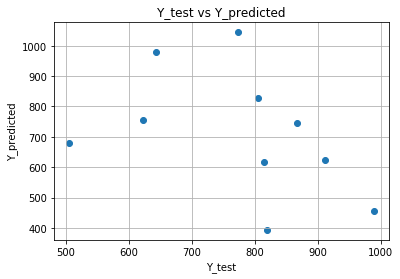

In [306]:
plt.scatter(Y_test,Y_pred)
plt.title("Y_test vs Y_predicted")
plt.xlabel("Y_test")
plt.ylabel("Y_predicted")
plt.grid('on')
plt.show()

In [307]:
# correlation coefficients

In [310]:
df.corr(method = 'pearson')

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.756505,0.533198,-0.135459,0.322519,-0.175224,-0.026283
X2,0.756505,1.000000,0.509339,-0.184445,0.291031,-0.199070,-0.045570
X3,0.533198,0.509339,1.000000,0.120265,0.311526,-0.277475,0.124502
X4,-0.135459,-0.184445,0.120265,1.000000,-0.537162,0.182364,0.681072
X5,0.322519,0.291031,0.311526,-0.537162,1.000000,-0.626953,-0.513958
X6,-0.175224,-0.199070,-0.277475,0.182364,-0.626953,1.000000,0.591663
X7,-0.026283,-0.045570,0.124502,0.681072,-0.513958,0.591663,1.000000


# Remove X7

In [324]:
X_train2, X_test2, Y_train2,Y_test2 = train_test_split(df[['X3','X4','X5','X6']],df['X1'],test_size = 0.2,random_state = 0)
model2 = LinearRegression()
model2.fit(X_train2,Y_train2)
model2.score(X_test2,Y_test2)

-3.3478484958251267

In [329]:
Y_pred2 = model2.predict(X_test2)

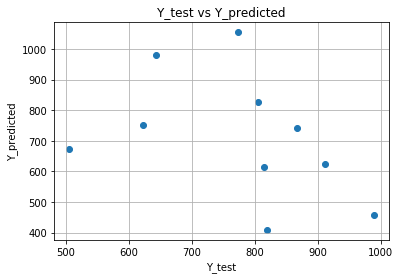

In [339]:
plt.scatter(Y_test2,Y_pred2)
plt.title("Y_test vs Y_predicted")
plt.xlabel("Y_test")
plt.ylabel("Y_predicted")
plt.grid('on')
plt.show()

In [371]:
# Correlation Heat map

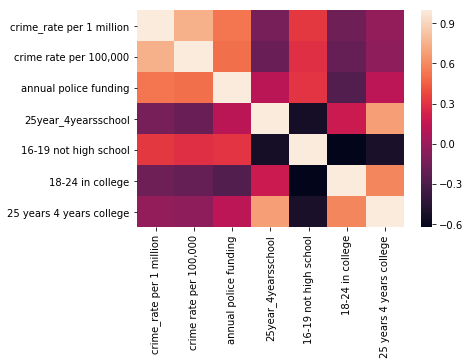

In [325]:
sns.heatmap(df2.corr())

In [372]:
# Distribution Plot

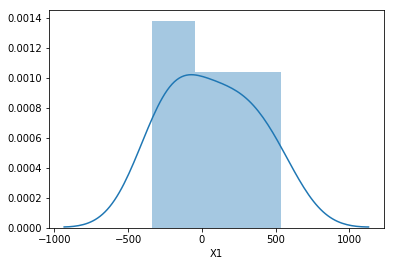

In [316]:
sns.distplot(Y_test-Y_pred)

In [373]:
# Do Not Remove X2 or X7

In [319]:
X_train3, X_test3, Y_train3,Y_test3 = train_test_split(df[['X2','X3','X4','X5','X6','X7']],df['X1'],test_size = 0.2,random_state = 0)

In [322]:
model3 = LinearRegression()
model3.fit(X_train3,Y_train3)
model3.score(X_test3,Y_test3)

-0.5132879785827147

In [327]:
Y_pred3 = model3.predict(X_test3)

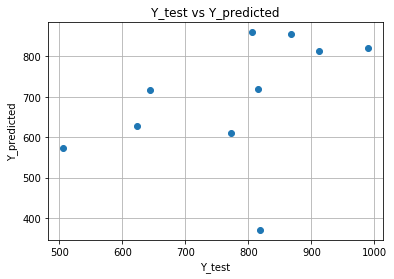

In [338]:
plt.scatter(Y_test3,Y_pred3)
plt.title("Y_test vs Y_predicted")
plt.xlabel("Y_test")
plt.ylabel("Y_predicted")
plt.grid('on')
plt.show()

# plot histogram X1

(array([10., 12.,  7., 12.,  5.,  0.,  0.,  2.,  1.,  1.]),
 array([ 341. ,  480.9,  620.8,  760.7,  900.6, 1040.5, 1180.4, 1320.3,
        1460.2, 1600.1, 1740. ]),
 <a list of 10 Patch objects>)

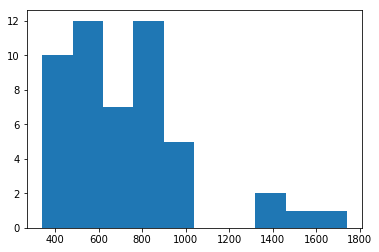

In [331]:
plt.hist(df['X1'])

# Remove Outliers X1 (95 %) and plot Y_test and Y_pred

In [349]:
elements = np.array(df['X1'])

In [350]:
mean = np.mean(df['X1'])

In [352]:
sd = np.std(df['X1'])

In [353]:
sd

290.98453292228436

In [363]:
df7 = df[df['X1'] > mean - 2*sd]

In [364]:
df8 = df7[df7['X1'] < mean + 2*sd]

In [366]:
X_train8, X_test8, Y_train8,Y_test8 = train_test_split(df8[['X2','X3','X4','X5','X6','X7']],df8['X1'],test_size = 0.2,random_state = 0)

In [367]:
model8 = LinearRegression()
model8.fit(X_train8,Y_train8)
model8.score(X_test8,Y_test8)

-1.453817719739475

In [369]:
Y_pred8 = model8.predict(X_test8)


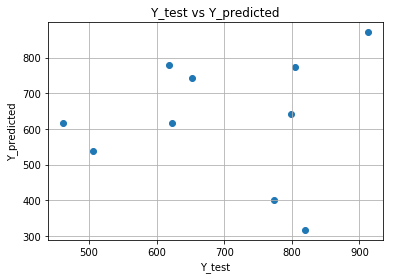

In [370]:
plt.scatter(Y_test8,Y_pred8)
plt.title("Y_test vs Y_predicted")
plt.xlabel("Y_test")
plt.ylabel("Y_predicted")
plt.grid('on')
plt.show()

# Remove X7 not X2

In [379]:
X_train9, X_test9, Y_train9,Y_test9 = train_test_split(df[['X2','X3','X4','X5','X6']],df['X1'],test_size = 0.2,random_state = 0)

In [380]:
model9 = LinearRegression()
model9.fit(X_train9,Y_train9)
model9.score(X_test9,Y_test9)

0.14530691959727782

In [381]:
Y_pred9 = model9.predict(X_test9)

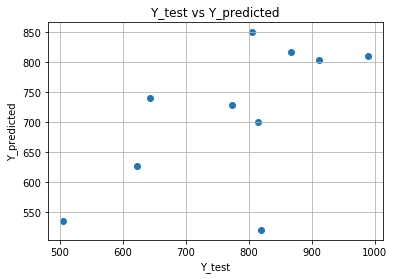

In [382]:
plt.scatter(Y_test9,Y_pred9)
plt.title("Y_test vs Y_predicted")
plt.xlabel("Y_test")
plt.ylabel("Y_predicted")
plt.grid('on')
plt.show()

# Remove X7 and X4

In [383]:
X_train5, X_test5, Y_train5,Y_test5 = train_test_split(df[['X2','X3','X5','X6']],df['X1'],test_size = 0.2,random_state = 0)

In [384]:
model5 = LinearRegression()
model5.fit(X_train5,Y_train5)
model5.score(X_test5,Y_test5)

0.1426840814131588

In [385]:
Y_pred5 = model5.predict(X_test5)

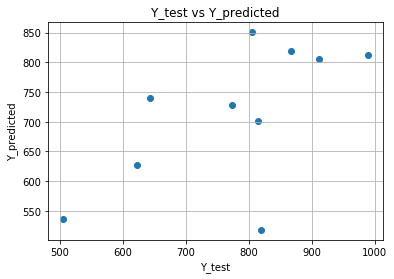

In [386]:
plt.scatter(Y_test5,Y_pred5)
plt.title("Y_test vs Y_predicted")
plt.xlabel("Y_test")
plt.ylabel("Y_predicted")
plt.grid('on')
plt.show()